# Les imports necessaires au programme

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC # Support Vector Classifier - peut utiliser différents noyaux
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline # Utile pour enchaîner vectorizer et classifieur
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA # Importer PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC



# Exemple de code de traitement des données numeriques par le SVM

Données générées avec 2 caractéristiques.
Taille de l'ensemble d'entraînement : 70 échantillons
Taille de l'ensemble de test : 30 échantillons
Précision du SVM linéaire sur l'ensemble de test : 1.0000


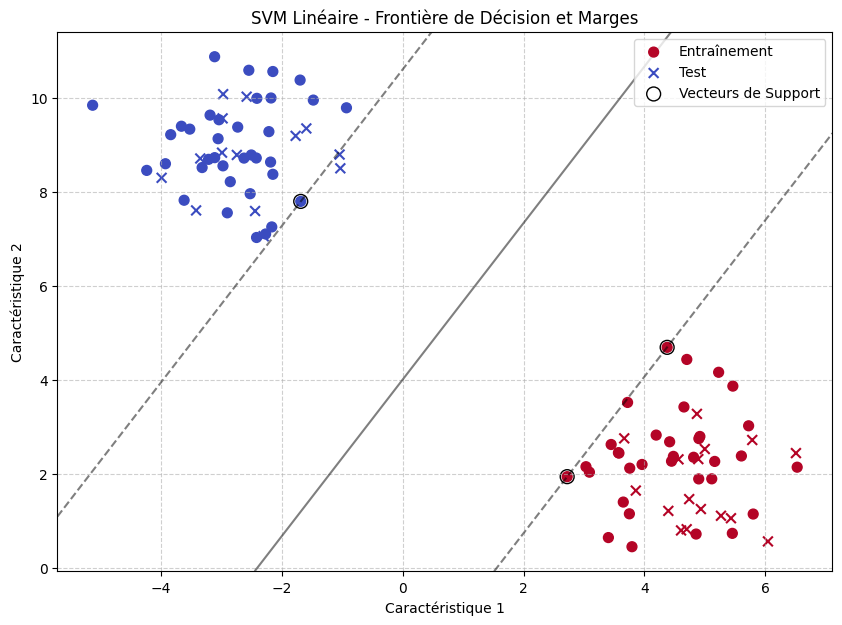


Nombre de vecteurs de support trouvés : 3
Coordonnées des vecteurs de support :
[[-1.68665271  7.79344248]
 [ 2.72110762  1.94665581]
 [ 4.375222    4.69333885]]


In [6]:
# --- 1. Génération de données linéairement séparables ---
# Crée 100 points autour de 2 centres distincts (2 classes)
# random_state assure la reproductibilité
X, y = make_blobs(n_samples=100, centers=2, n_features=2,
                  cluster_std=1.0, random_state=42)

# --- 2. Division des données (entraînement / test) ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- 3. Création et entraînement du modèle SVM Linéaire ---
# Nous utilisons svm.SVC (Support Vector Classifier)
# et spécifions kernel='linear' pour un SVM linéaire.
# C=1.0 est un paramètre de régularisation (marge douce).
# Des valeurs plus faibles de C permettent une marge plus large mais plus d'erreurs.
linear_svm = svm.SVC(kernel='linear', C=1.0)
linear_svm.fit(X_train, y_train)

# --- 4. Prédiction et Évaluation ---
y_pred = linear_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Données générées avec {X.shape[1]} caractéristiques.")
print(f"Taille de l'ensemble d'entraînement : {X_train.shape[0]} échantillons")
print(f"Taille de l'ensemble de test : {X_test.shape[0]} échantillons")
print(f"Précision du SVM linéaire sur l'ensemble de test : {accuracy:.4f}")

# --- 5. Visualisation ---
plt.figure(figsize=(10, 7))

# Afficher les points de données (entraînement et test)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=50, label='Entraînement')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, s=50, marker='x', label='Test')

# Créer une grille pour tracer la frontière de décision
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Créer la grille
xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T # Combinaison des points de la grille

# Prédire la classe pour chaque point de la grille
Z = linear_svm.decision_function(xy).reshape(XX.shape) # Utilise decision_function pour tracer les marges aussi

# Tracer la frontière de décision et les marges
# La frontière est où decision_function = 0
# Les marges sont où decision_function = -1 et +1
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Mettre en évidence les vecteurs de support
# Les vecteurs de support sont stockés dans l'attribut support_vectors_
support_vectors = linear_svm.support_vectors_
ax.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', label='Vecteurs de Support')

plt.title('SVM Linéaire - Frontière de Décision et Marges')
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print(f"\nNombre de vecteurs de support trouvés : {len(support_vectors)}")
print("Coordonnées des vecteurs de support :")
print(support_vectors)

# Exemple de code de traitement des données non-numériques(textuelles) par le SVM

Taille entraînement: 7 textes
Taille test: 3 textes

Entraînement du modèle...
Entraînement terminé.

Évaluation sur l'ensemble de test...
Prédictions sur le test: [1 0 1]
Vraies étiquettes test: [1 0 0]

Précision (Accuracy) : 0.6667

Rapport de Classification :
              precision    recall  f1-score   support

 Négatif (0)       1.00      0.50      0.67         2
 Positif (1)       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3


Préparation de la visualisation...


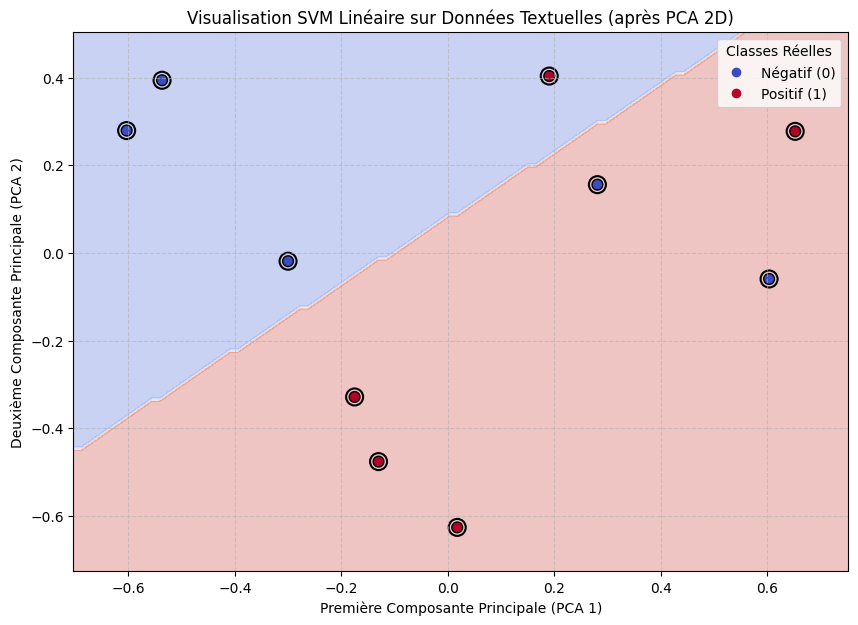

Visualisation terminée.


In [8]:
# --- 1. Données Textuelles d'Exemple ---
corpus = [
    "Ce film était absolument génial, super acteurs !",      # Positif (1)
    "Très déçu par ce produit, ne fonctionne pas bien.",   # Négatif (0)
    "Excellent service client, très réactif et utile.",    # Positif (1)
    "Une perte de temps et d'argent, horrible expérience.",# Négatif (0)
    "J'ai adoré la nourriture, c'était délicieux.",        # Positif (1)
    "Le livre était ennuyeux et mal écrit.",              # Négatif (0)
    "Magnifique paysage, vacances parfaites.",            # Positif (1)
    "Quelle arnaque, produit de mauvaise qualité.",       # Négatif (0)
    "Personnel sympathique et accueillant.",               # Positif (1)
    "Je ne recommande pas du tout, très mauvais.",         # Négatif (0)
]
labels = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

# --- 2. Division des données (entraînement / test) ---
X_train_text, X_test_text, y_train, y_test = train_test_split(
    corpus, labels, test_size=0.3, random_state=42
)

print(f"Taille entraînement: {len(X_train_text)} textes")
print(f"Taille test: {len(X_test_text)} textes\n")

# --- 3. Création du Pipeline (Vectorisation + Classification) ---
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=None)),
    ('svm_linear', SVC(kernel='linear', C=1.0, probability=True))
])

# --- 4. Entraînement du Pipeline ---
print("Entraînement du modèle...")
pipeline.fit(X_train_text, y_train)
print("Entraînement terminé.\n")

# --- 5. Prédiction et Évaluation sur l'ensemble de test ---
print("Évaluation sur l'ensemble de test...")
y_pred = pipeline.predict(X_test_text)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Négatif (0)', 'Positif (1)'])
print(f"Prédictions sur le test: {y_pred}")
print(f"Vraies étiquettes test: {y_test}")
print(f"\nPrécision (Accuracy) : {accuracy:.4f}")
print("\nRapport de Classification :")
print(report)

# --- 6. Faire une prédiction sur un nouveau texte ---
# (Code identique à l'exemple précédent... omis pour la brièveté)
# print("="*30)
# ...
# print("="*30)


# --- 7. VISUALISATION (après entraînement) ---
print("\nPréparation de la visualisation...")

# Récupérer le vectorizer ajusté depuis le pipeline
vectorizer = pipeline.named_steps['tfidf']

# Transformer TOUTES les données textuelles (train + test) en TF-IDF
# pour les visualiser ensemble dans l'espace réduit
X_all_text = corpus # Utiliser tout le corpus pour la visualisation
y_all = labels
X_tfidf_all = vectorizer.transform(X_all_text) # Utiliser transform, pas fit_transform

# Réduire la dimensionnalité de la matrice TF-IDF à 2D avec PCA
pca = PCA(n_components=2, random_state=42)
# Ajuster PCA sur les données TF-IDF et les transformer
X_pca_all = pca.fit_transform(X_tfidf_all.toarray()) # .toarray() si la sortie est sparse

# Pour tracer la frontière, nous entraînons un NOUVEAU SVM
# *uniquement* sur les données réduites en 2D (PCA).
# Ceci est une simplification pour la visualisation. La frontière
# tracée ici est celle d'un SVM dans l'espace 2D PCA, qui approxime
# la projection de la frontière du SVM haute-dimension original.
svm_2d = SVC(kernel='linear', C=1.0)
svm_2d.fit(X_pca_all, y_all) # Entraîner sur toutes les données réduites

# Créer une grille de points dans l'espace 2D PCA
x_min, x_max = X_pca_all[:, 0].min() - 0.1, X_pca_all[:, 0].max() + 0.1
y_min, y_max = X_pca_all[:, 1].min() - 0.1, X_pca_all[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Prédire la classe pour chaque point de la grille avec le SVM 2D
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Créer le graphique
plt.figure(figsize=(10, 7))

# Tracer la frontière de décision et les régions colorées
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)

# Tracer les points de données projetés en 2D par PCA
# Colorer les points selon leur vraie étiquette
scatter = plt.scatter(X_pca_all[:, 0], X_pca_all[:, 1], c=y_all,
                      cmap=plt.cm.coolwarm, edgecolors='k', s=60)

# Ajouter les vecteurs de support du modèle 2D (optionnel, pour info)
support_vectors_2d = svm_2d.support_vectors_
plt.scatter(support_vectors_2d[:, 0], support_vectors_2d[:, 1], s=150,
            facecolors='none', edgecolors='k', linewidth=1.5,
            label='Vecteurs de Support (2D)')


plt.title('Visualisation SVM Linéaire sur Données Textuelles (après PCA 2D)')
plt.xlabel('Première Composante Principale (PCA 1)')
plt.ylabel('Deuxième Composante Principale (PCA 2)')

# Créer une légende personnalisée
handles, _ = scatter.legend_elements()
legend_labels = ['Négatif (0)', 'Positif (1)']
plt.legend(handles, legend_labels, title="Classes Réelles")

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("Visualisation terminée.")